# Rev 15 dated 31-Dec-2024

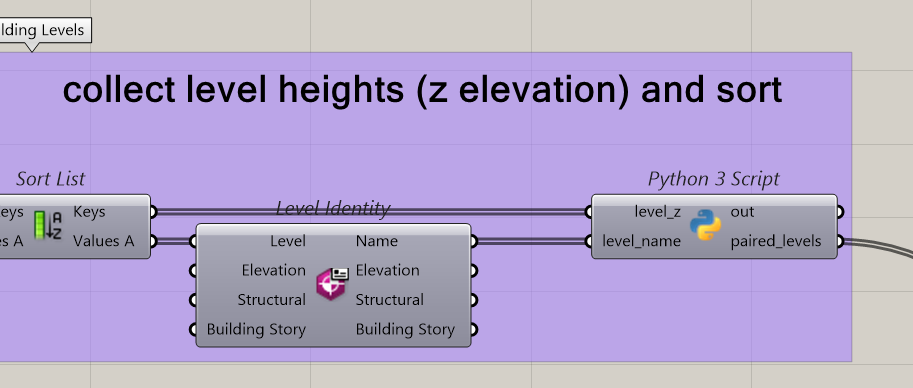

In [ ]:
"""Grasshopper Script"""
paired_levels = (level_name, level_z)

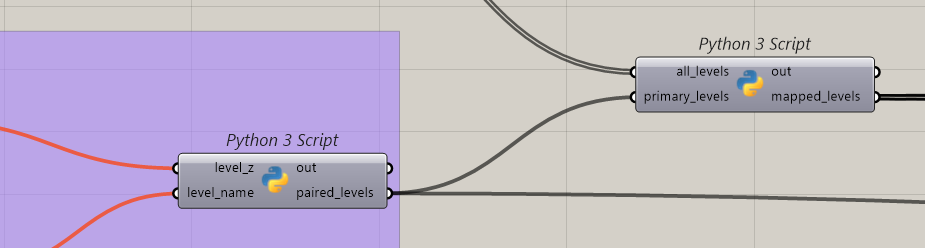

In [ ]:
"""Grasshopper Script"""
paired_levels = (level_name, level_z)

In [ ]:
import math
rounding_digits = 2
mapped_levels = []

def get_nearest_level (selected_level, levels):
    distance = 1e9
    result = selected_level
    for level in levels:
        calculated_distance = abs( selected_level[1] - level[1] )
        if calculated_distance < distance:
            result = level
            distance = calculated_distance
    return result


for level in all_levels:
    level_name = level[0]
    level_elevation = level[1]
    refrence_level_name, refrence_level_elevation = get_nearest_level(level, primary_levels)
    mapped_levels.append((
        level_name,{
            'level_elevation':round(level_elevation,rounding_digits),
            'refrence_level_name':refrence_level_name,
            'refrence_level_elevation':round(refrence_level_elevation,rounding_digits)
    }))



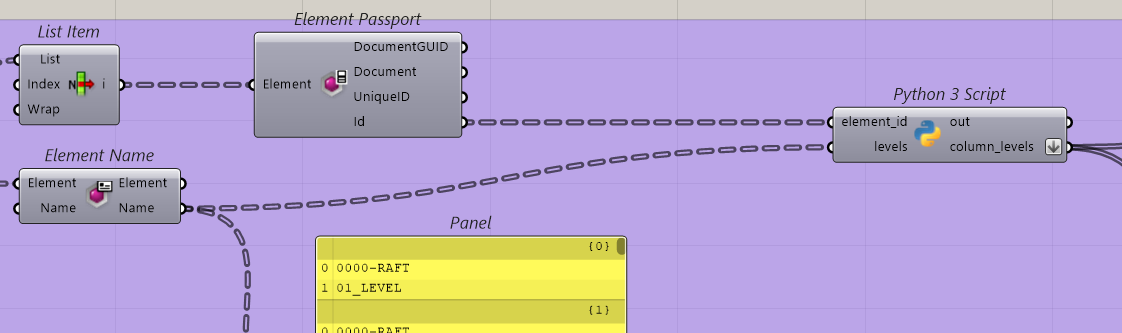

In [ ]:
column_levels = (element_id,{"base_level":levels[0], "top_level":levels[1]})

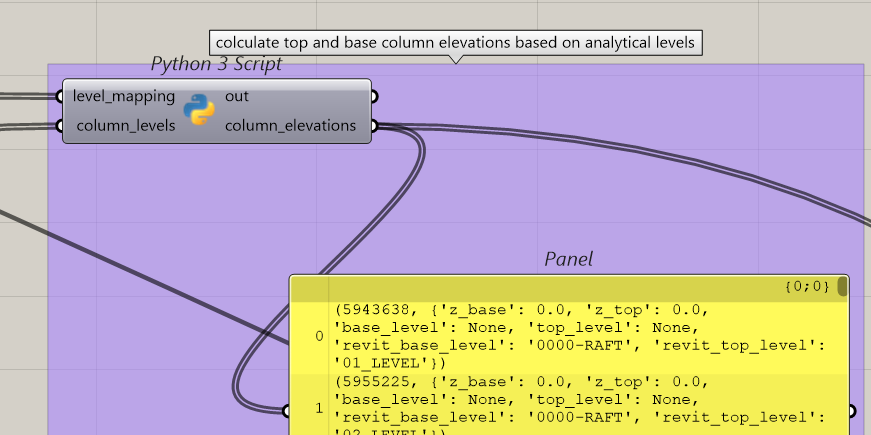

In [ ]:
column_id = column_levels[0]
base_level = column_levels[1]['base_level']
top_level = column_levels[1]['top_level']

level_dictionary = {level[0]:level[1] for level in level_mapping}
z_base = level_dictionary[base_level]['refrence_level_elevation']
z_top = level_dictionary[top_level]['refrence_level_elevation']
mapped_base_level = level_dictionary[base_level]['refrence_level_name']
mapped_top_level = level_dictionary[top_level]['refrence_level_name']

column_elevations = (column_id,{
    'z_base':z_base,
    'z_top':z_top,
    'base_level':mapped_base_level,
    'top_level':mapped_top_level,
    'revit_base_level':base_level,
    'revit_top_level':top_level
})

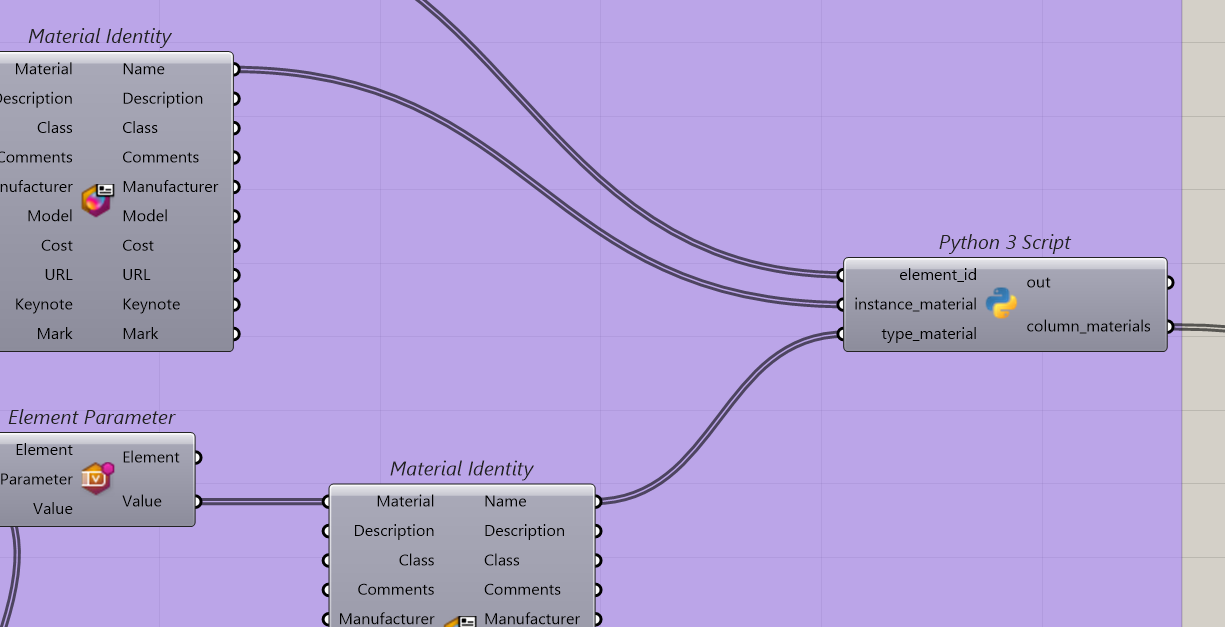

In [ ]:
material = instance_material if instance_material else type_material

# old version, check the new below
def get_material_grade(material:str):
    material = material.upper()
    if '_CON_' in material:
        grade = material.split('_CON_RC ')[1]
    elif '_MTL_STEEL' in material:
        grade = material.split('_MTL_STEEL ')[1]
    return grade


def get_material_grade(material:str):
    grade = material.split('_')[-1].split(' ')[-1]
    return grade


column_materials = (element_id,{'material_name':material,
'material_grade':get_material_grade(material)})

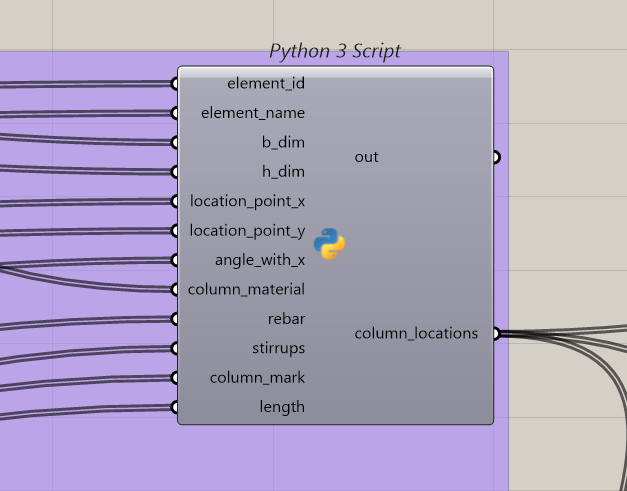

In [ ]:
rounding_digits = 2
angle = angle_with_x
if angle == 180 or angle == 360:
    angle = 0.0
elif angle == 270:
    angle = 90.0

material_grade = column_material[1]['material_grade'].upper()
material_name = column_material[1]['material_name']

# old version, check the new below
def get_type_dimensions(type_name:str,material_grade:str):
    dim:str = type_name.split('_')[-1].upper()
    if material_grade.startswith('FC'):
        if dim.startswith('D'):
            section_type = 'CIR'
            b = float(dim[1:])
            h = None
        else:
            section_type = 'REC'
            b = float(dim.split('X')[0])
            h = float(dim.split('X')[1])
    elif material_grade.startswith('S'):
        section_type = 'REC'
        b = 150.0
        h = 150.0
    return section_type,b,h


def get_type_dimensions(type_name:str,material_grade:str):
    dim:str = type_name.split('_')[-1].upper()
    if material_grade.startswith('FC'):
        b = round(float(b_dim),rounding_digits) if b_dim else None
        if dim.startswith('D'):
            section_type = 'CIR'
            h = None
        else:
            section_type = 'REC'
            h = round(float(h_dim),rounding_digits) if h_dim else b
    elif material_grade.startswith('S'):
        section_type = 'REC'
        b = 120.0
        h = 120.0
    return section_type,b,h


section_type, b, h = get_type_dimensions(element_name,material_grade)

if rebar == 'T':
    rebar = None
if stirrups == 'T@':
    stirrups = None

column_locations = (element_id,{'name':element_name,
'x':round(location_point_x,rounding_digits),
'y':round(location_point_y,rounding_digits),
'revit_x':round(location_point_x,rounding_digits),
'revit_y':round(location_point_y,rounding_digits),
'angle':round(angle,rounding_digits),
'section_type':section_type,
'b':b,
'h':h,
'material_name':material_name,
'material_grade':material_grade,
'rebar':rebar if rebar else None,
'stirrups':stirrups if stirrups else None,
'column_mark':column_mark if column_mark else None,
'length':length if length else None
})

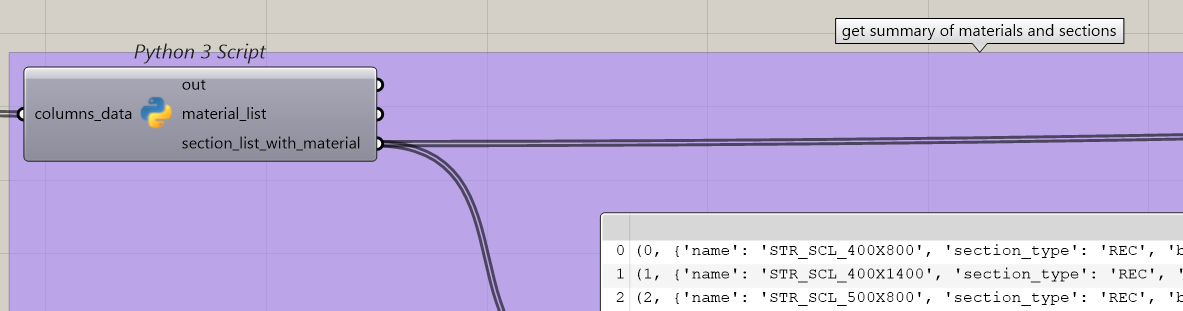

In [ ]:

material_list = []
section_list_with_material = []
section_list = []
for column in columns_data:
    material_grade = column[1]['material_grade']
    if material_grade not in material_list:
        material_list.append(material_grade)

section_index = 0
for column in columns_data:
    section = column[1]['name'] + '_' + column[1]['material_grade'] + '_' + str(column[1]['rebar'])
    if section not in section_list:
        section_list.append(section)
        section_list_with_material.append((
            section_index,
            {
                'name':column[1]['name'],
                'section_type':column[1]['section_type'],
                'b':column[1]['b'],
                'h':column[1]['h'],
                'rebar': column[1]['rebar'],
                'material_grade':column[1]['material_grade']
            }
        ))
        section_index += 1


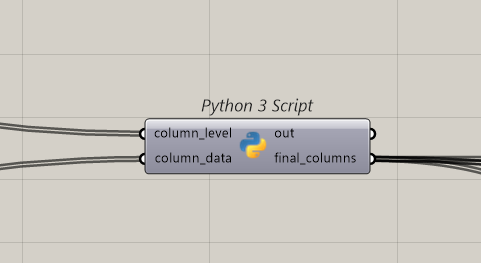

In [ ]:
final_columns = (column_data[0],column_data[1] | column_level[1])

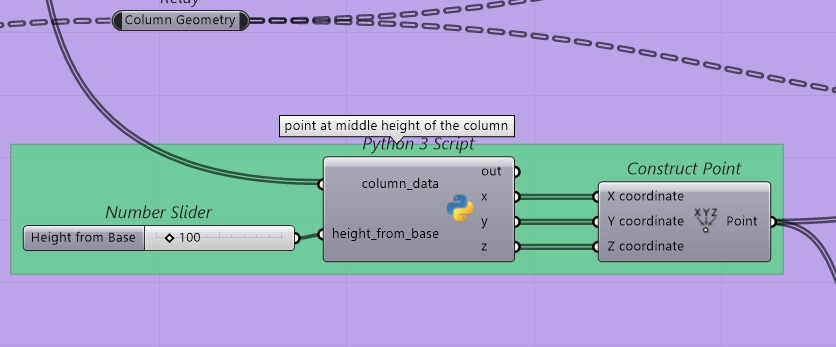

In [ ]:
x = column_data[1]['x']
y = column_data[1]['y']

z_base = column_data[1]['z_base'] 
z_top = column_data[1]['z_top']

if height_from_base > 0:
    z = z_base + height_from_base
else:
    z = 0.5 * (z_base + z_top)

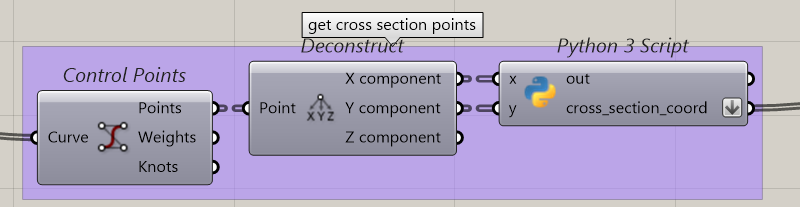

In [ ]:
cross_section_coord = {
    'x':x,
    'y':y
}

cross_section_coord = cross_section_coord.items()

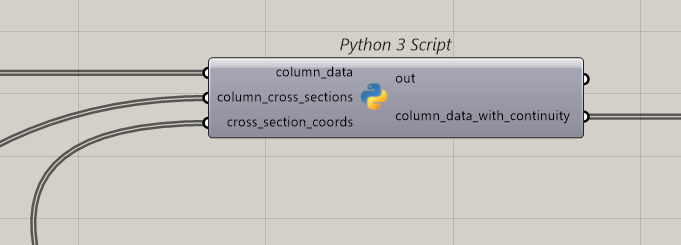

In [ ]:
# filtered_dict = {k:v for (k,v) in d.items() if filter_string in k}
import ghpythonlib.components as gh
epsilon = 1e-2

result = []

for column in column_data:
    column[1]['column_above'] = None
    column[1]['column_below'] = None

for column,cross_section_coord in zip(column_data,cross_section_coords) :
    column[1]['cross_section_coord'] = dict(cross_section_coord)


def get_top_section(column,section):
    z_top = column[1]['z_top']
    x = column[1]['x']
    y = column[1]['y']
    top_point = gh.ConstructPoint(x,y,z_top)
    section_area = gh.BoundarySurfaces(section)
    section_center_point = gh.Area(section_area)[1]
    vector_up = gh.Vector2Pt(section_center_point,top_point,False)[0]
    top_section = gh.Move(section,vector_up)[0]
    return top_section

def get_base_section(column, section):
    z_base = column[1]['z_base']
    x = column[1]['x']
    y = column[1]['y']
    base_point = gh.ConstructPoint(x,y,z_base)
    section_area = gh.BoundarySurfaces(section)
    section_center_point = gh.Area(section_area)[1]
    vector_down = gh.Vector2Pt(section_center_point,base_point,False)[0]
    base_section = gh.Move(section,vector_down)[0]
    return base_section


for column,section in zip(column_data, column_cross_sections):
    column_id = column[0]
    z_base = column[1]['z_base']
    z_top = column[1]['z_top']

    # search for column above
    for col_above in column_data:
        if col_above[0] == column_id:
            continue
        col_above_z_base = col_above[1]['z_base']
        if abs(col_above_z_base - z_top) > epsilon:
            continue
        col_above_base_pnt = gh.ConstructPoint(
            col_above[1]['x'],
            col_above[1]['y'],
            col_above_z_base
        )
        if gh.PointInCurve(col_above_base_pnt,get_top_section(column,section))[0] == 2:
            column[1]['column_above'] = col_above[0]
            if not col_above[1]['column_below']:
                col_above[1]['column_below'] = column_id
            break

    # search for column below
    for col_below, section_below in zip(column_data, column_cross_sections):
        if column[1]['column_below']:
            continue
        if col_below[0] == column_id:
            continue
        col_below_z_top = col_below[1]['z_top']
        if abs(col_below_z_top - z_base) > epsilon:
            continue
        col_base_pnt = gh.ConstructPoint(
            column[1]['x'],
            column[1]['y'],
            column[1]['z_base']
        )

        if gh.PointInCurve(col_base_pnt,get_top_section(col_below, section_below))[0] == 2:
            column[1]['column_below'] = col_below[0]
            if not col_below[1]['column_above']:
                col_below[1]['column_above'] = column_id
            break

    result.append(column)



column_data_with_continuity = result


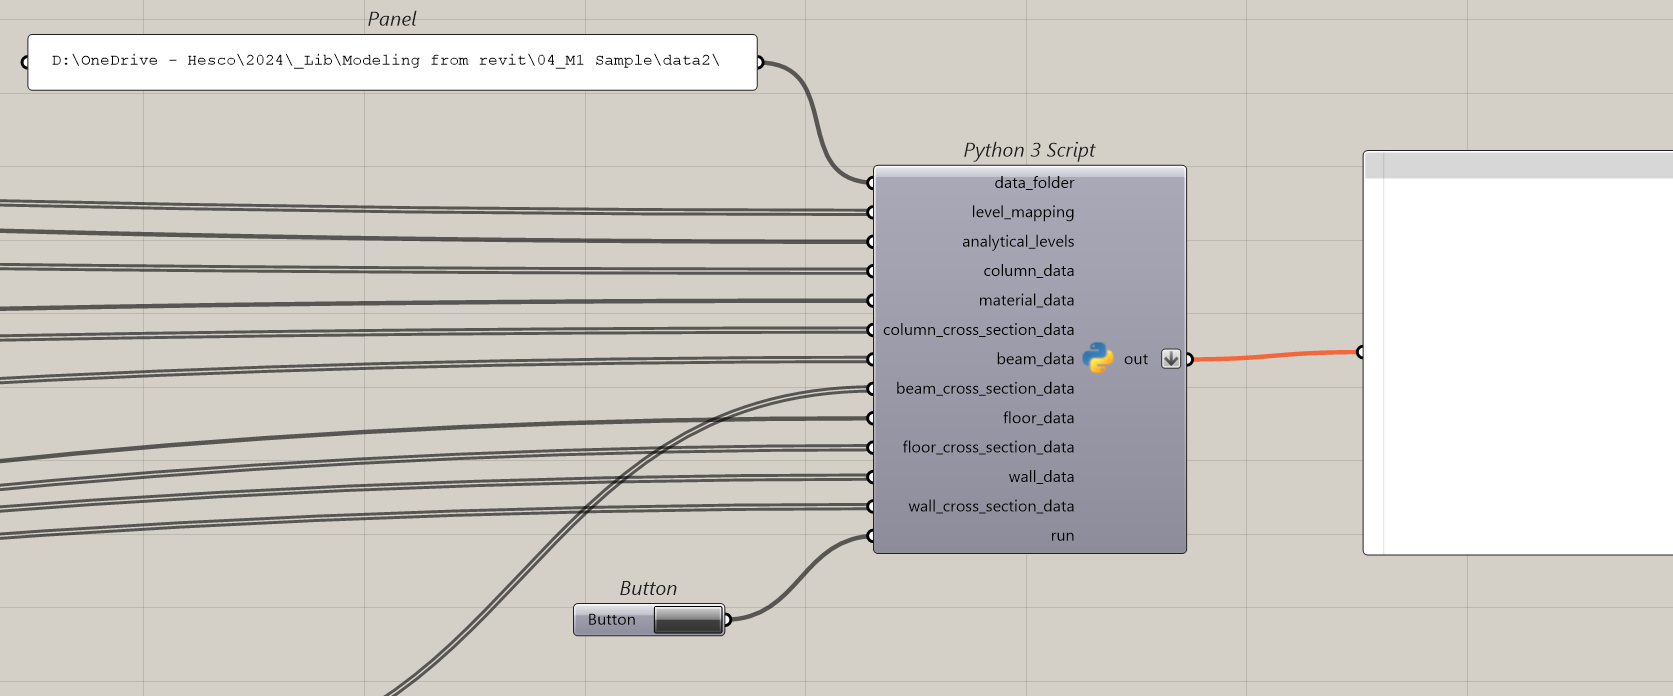

In [ ]:
import rhinoscriptsyntax as rs
import json

def export_json(filename, data):
    # If the file name exists, write a JSON string into the file.
    if filename:
        # Writing JSON data
        with open(filename, 'w') as f:
            json.dump(data, f)

mapped_levels = {k:v for k,v in level_mapping}

if run:
    filename = data_folder + 'mapped_levels.json'
    data = mapped_levels
    export_json(filename,data)
    print(filename)

    filename = data_folder + 'analytical_levels.json'
    data = analytical_levels
    export_json(filename,data)
    print(filename)

    filename = data_folder + 'material_data.json'
    data = material_data
    export_json(filename,data)
    print(filename)

    filename = data_folder + 'column_data.json'
    data = column_data
    export_json(filename,data)
    print(filename)

    filename = data_folder + 'column_cross_section_data.json'
    data = column_cross_section_data
    export_json(filename,data)
    print(filename)

    filename = data_folder + 'beam_data.json'
    data = beam_data
    export_json(filename,data)
    print(filename)

    filename = data_folder + 'beam_cross_section_data.json'
    data = beam_cross_section_data
    export_json(filename,data)
    print(filename)
    
    filename = data_folder + 'floor_data.json'
    data = floor_data
    export_json(filename,data)
    print(filename)

    filename = data_folder + 'floor_cross_section_data.json'
    data = floor_cross_section_data
    export_json(filename,data)
    print(filename)

    filename = data_folder + 'wall_data.json'
    data = wall_data
    export_json(filename,data)
    print(filename)

    filename = data_folder + 'wall_cross_section_data.json'
    data = wall_cross_section_data
    export_json(filename,data)
    print(filename)


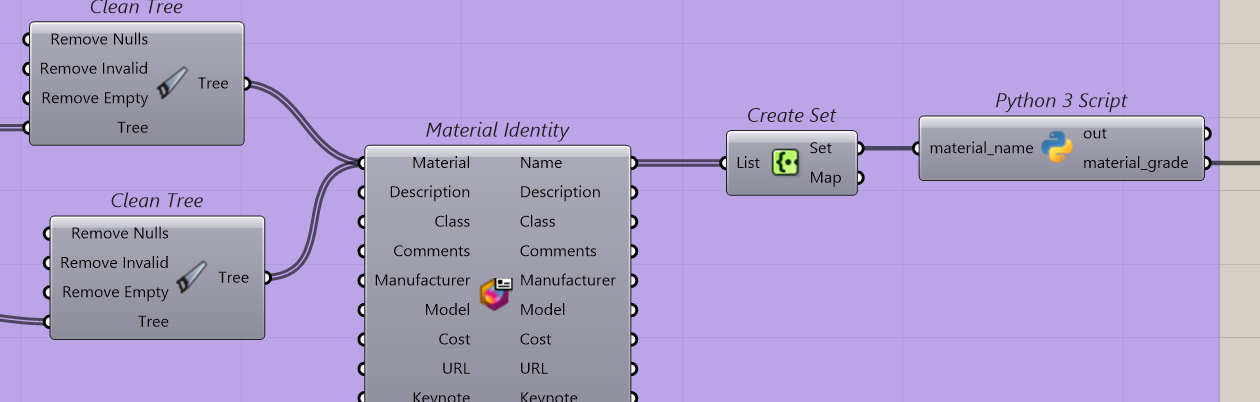

In [ ]:

material_grade = material_name.split('_')[-1].split(' ')[-1]

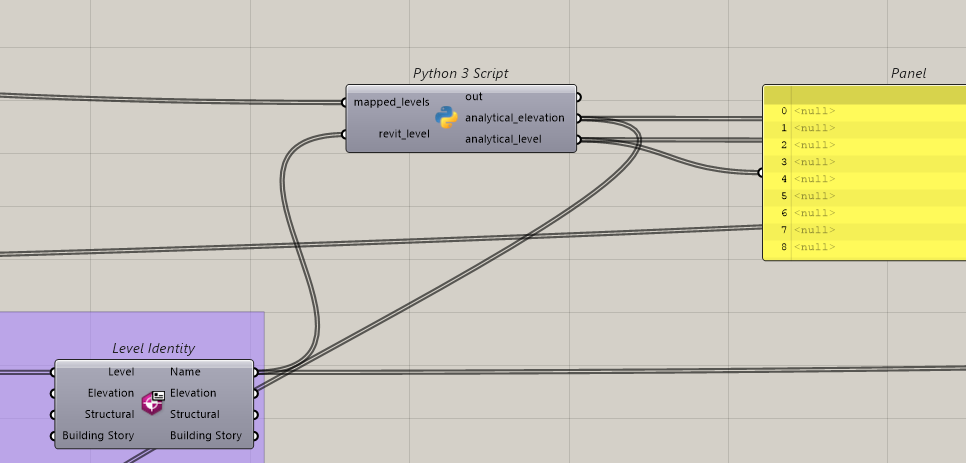

In [ ]:
level_dict = {k:v for k,v in mapped_levels}
analytical_elevation = mapped_levels
analytical_elevation = level_dict[revit_level]['refrence_level_elevation']
analytical_level = level_dict[revit_level]['refrence_level_name']

'''
analytical_elevation = []
for rvt_level in revit_levels:
    for level in mapped_levels:
        if level[0] == rvt_level:
            analytical_elevation.append(level[1]['refrence_level_elevation'])
            break
'''

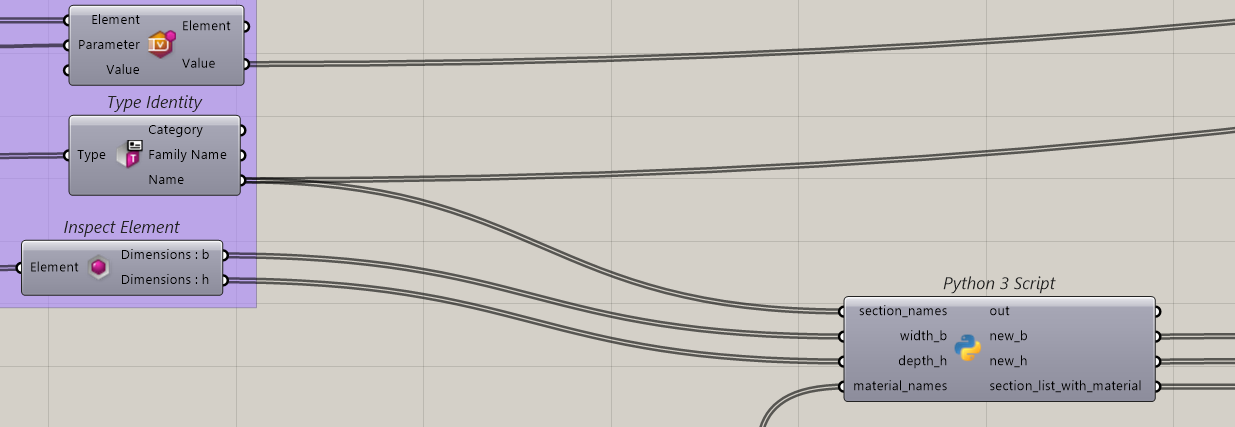

In [ ]:
section_list_with_material = []
names = []
new_b = []
new_h = []
counter = 0
for name,material,b,h in zip(section_names, material_names,width_b,depth_h):
    material_grade = material.split('_')[-1].split(' ')[-1]
    if material_grade.upper().startswith('FC'):
        width = round(b,3) if b else 250.0
        depth = round(h,3) if h else 550.0
    else:
        width = 50.0
        depth = 50.0
    new_b.append(width)
    new_h.append(depth)

    tmp_name = name + material
    if tmp_name in names:
        continue
    section_list_with_material.append((counter,{
        'name':name,
        'section_type':'REC',
        'b':width,
        'h':depth,
        'material_grade':material_grade
    }))
    names.append(tmp_name)
    counter += 1


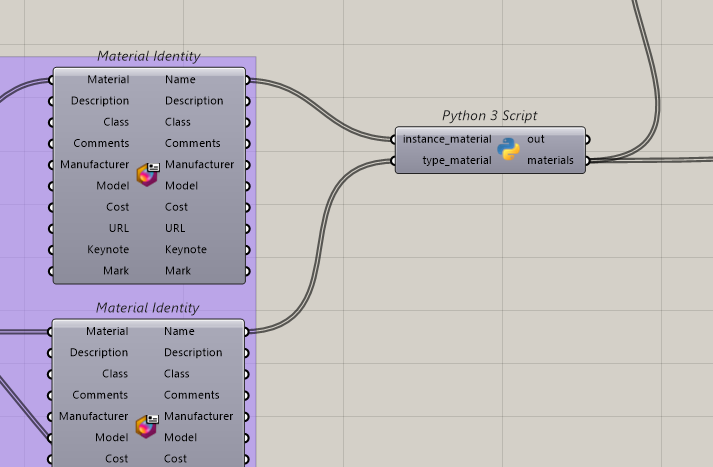

In [ ]:
if instance_material:
    materials = instance_material
else:
    materials = type_material


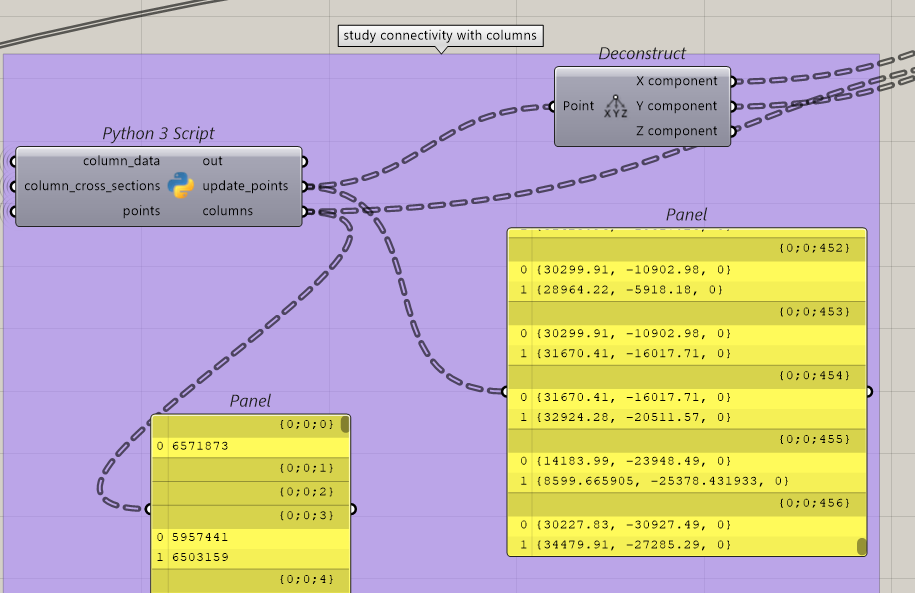

In [ ]:
# filtered_dict = {k:v for (k,v) in d.items() if filter_string in k}
import ghpythonlib.components as gh
epsilon = 1e-2


update_points = []
columns = []



def get_top_section(column,section):
    z_top = column[1]['z_top']
    x = column[1]['x']
    y = column[1]['y']
    top_point = gh.ConstructPoint(x,y,z_top)
    section_area = gh.BoundarySurfaces(section)
    section_center_point = gh.Area(section_area)[1]
    vector_up = gh.Vector2Pt(section_center_point,top_point,False)[0]
    top_section = gh.Move(section,vector_up)[0]
    return top_section

#control_points = gh.ControlPoints(beam)[0]
#for pnt in control_points:
#    points.append(gh.ConstructPoint(pnt.X,pnt.Y,pnt.Z))
#points = control_points

for pnt in points:
    point_not_updated = True
    for column,section in zip(column_data, column_cross_sections):
        column_id = column[0]
        col_z_top = column[1]['z_top']
        col_x = column[1]['x']
        col_y = column[1]['y']

        if abs(pnt.Z - col_z_top) > epsilon:
            continue
        
        if gh.PointInCurve(pnt,get_top_section(column,section))[0] == 2:
            columns.append(column_id)
            new_pnt = gh.ConstructPoint(col_x,col_y,col_z_top)
            update_points.append(new_pnt)
            point_not_updated = False
            break
    if point_not_updated:
        update_points.append(pnt)


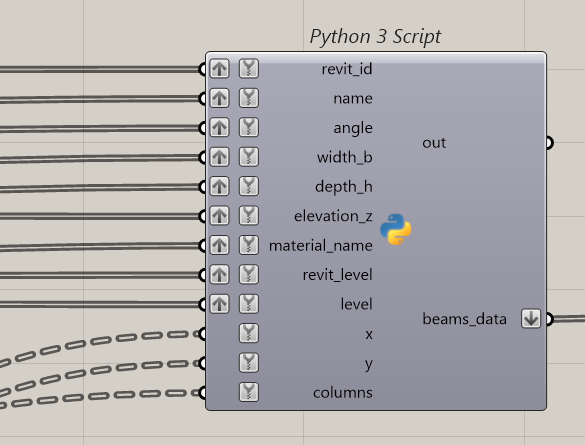

In [ ]:
beams_data = (revit_id, {
    'name':name,
    'x':x,
    'y':y,
    'z':elevation_z,
    'angle':angle,
    'b':width_b,
    'h':depth_h,
    'material_name':material_name,
    'revit_level':revit_level,
    'level':level,
    'material_grade': material_name.split('_')[-1].split(' ')[-1],
    'columns':columns if columns else None
})

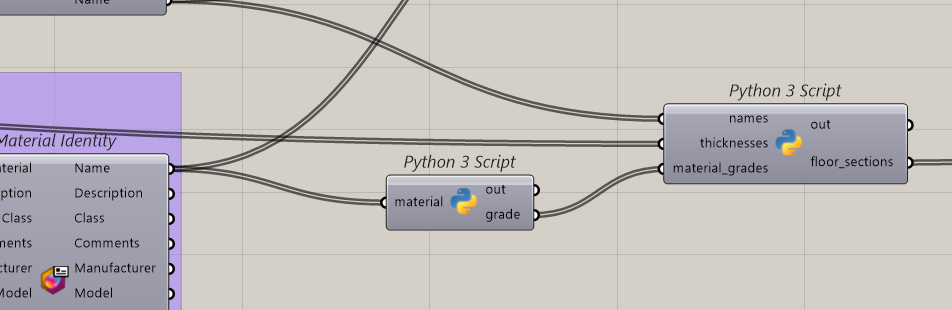

In [ ]:
floor_sections = []
check_duplicates = []
counter = 0
for name,grade,thk in zip(names,material_grades,thicknesses):
    tmp_name = name + grade + str(thk)
    if tmp_name in check_duplicates:
        continue
    floor_sections.append((counter, {
        'name':name,
        'thk':round(thk,3),
        'material_grade':grade
    }))
    check_duplicates.append(tmp_name)
    counter +=1

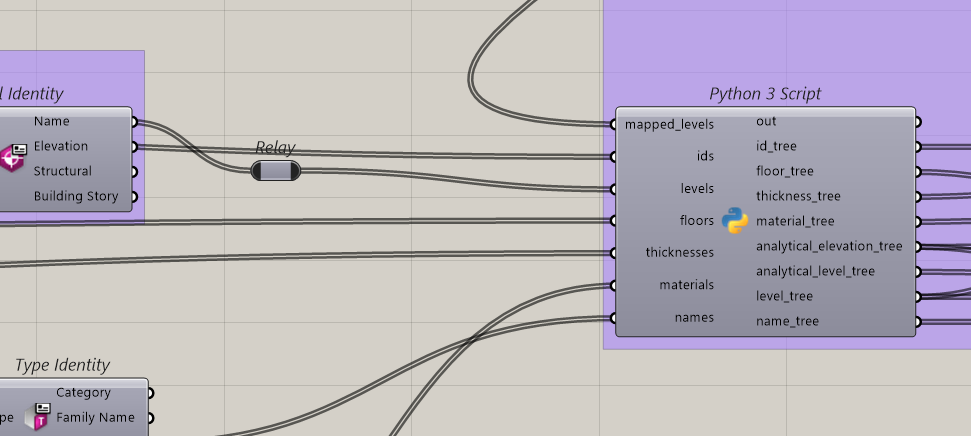

In [ ]:
import ghpythonlib.treehelpers as th
import json


def create_tree_from_dict(dictionary, data_column_indx):
    tree = []
    for k,v in dictionary.items():
        data = []
        for row in v:
            data.append(row[data_column_indx])
        tree.append(data)
    tree = th.list_to_tree(tree, source=[0,0])
    return tree


levels_dict = {k:v for k,v in mapped_levels}
analytical_elevations = [levels_dict[level]['refrence_level_elevation'] for level in levels]

elv_set = list(set(analytical_elevations))
none_dict = [None] * len(elv_set)
elv_dict = {k:v for k,v in zip(elv_set,none_dict)}

for elevation in elv_set:
    data = []
    for revit_id, floor, thickness, material, analytical_elevation,level,name in zip(ids,floors,thicknesses, materials, analytical_elevations,levels,names):
        if elevation == analytical_elevation:
            data.append((revit_id, floor, thickness, material, analytical_elevation,level,name, levels_dict[level]['refrence_level_name']))
    elv_dict[elevation] = data

id_tree = create_tree_from_dict(elv_dict, 0)
floor_tree = create_tree_from_dict(elv_dict, 1)
thickness_tree = create_tree_from_dict(elv_dict, 2)
material_tree = create_tree_from_dict(elv_dict, 3)
analytical_elevation_tree = create_tree_from_dict(elv_dict, 4)
level_tree = create_tree_from_dict(elv_dict, 5)
name_tree = create_tree_from_dict(elv_dict, 6)
analytical_level_tree = create_tree_from_dict(elv_dict, 7)



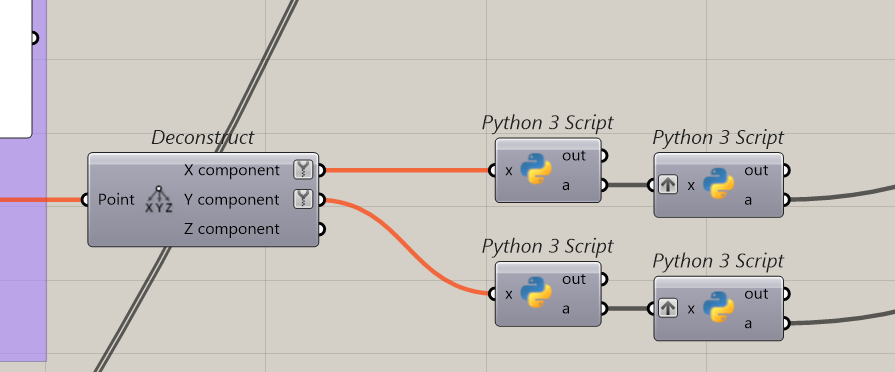

In [ ]:
import ghpythonlib.treehelpers as th

a = []
x_coor = []
tree = {}
print(x.BranchCount)
for i in range(x.BranchCount):
    branchList = x.Branch(i)
    branchPath = x.Path(i)
    main_branch = int(str(branchPath)[1:].split(';')[0])
    x_coor = []
    for j in range(branchList.Count):
        s = str(branchPath) + "[" + str(j) + "] "
        s += str(branchList[j])
        a.append(s)
        x_coor.append( float(branchList[j]) )
    if not tree.get(main_branch, None):
        tree[main_branch] = []
    tree[main_branch].append(x_coor)
a = tree.items()
a = list(tree.values())
#print(tree)


#coor_tree = [list() for _ in tree.keys()]
#coor_tree=[]
#for k,v in tree.items():
#    coor_tree.append(v)
#coor_tree = th.list_to_tree(coor_tree, source=[0,0])
#a = coor_tree

In [ ]:
a = tuple(x)


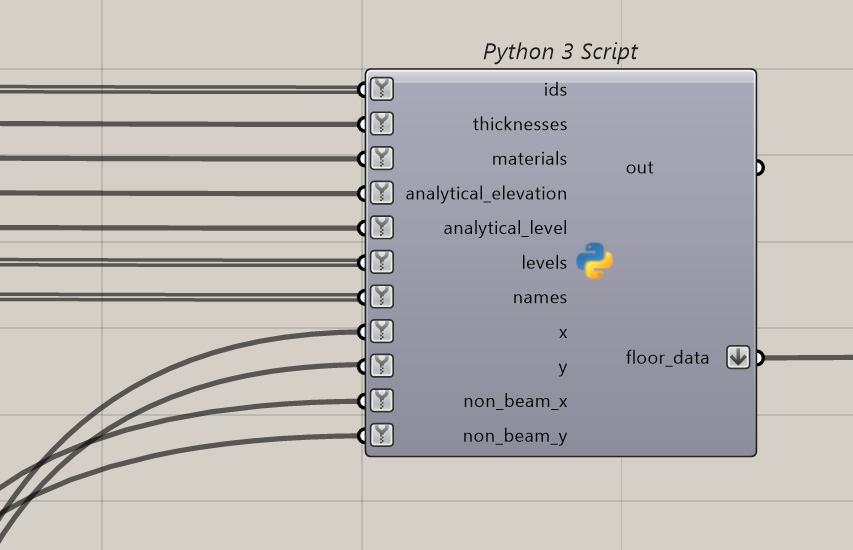

In [ ]:
floor_data = (tuple(ids), {
    'name':tuple(names),
    'z':analytical_elevation,
    'thk':thicknesses,
    'material_name':materials,
    'material_grade': materials.split('_')[-1].split(' ')[-1],
    'revit_level':levels,
    'level':analytical_level,
    'x':x,
    'y':y,
    'non_beam_x':non_beam_x,
    'non_beam_y':non_beam_y
})


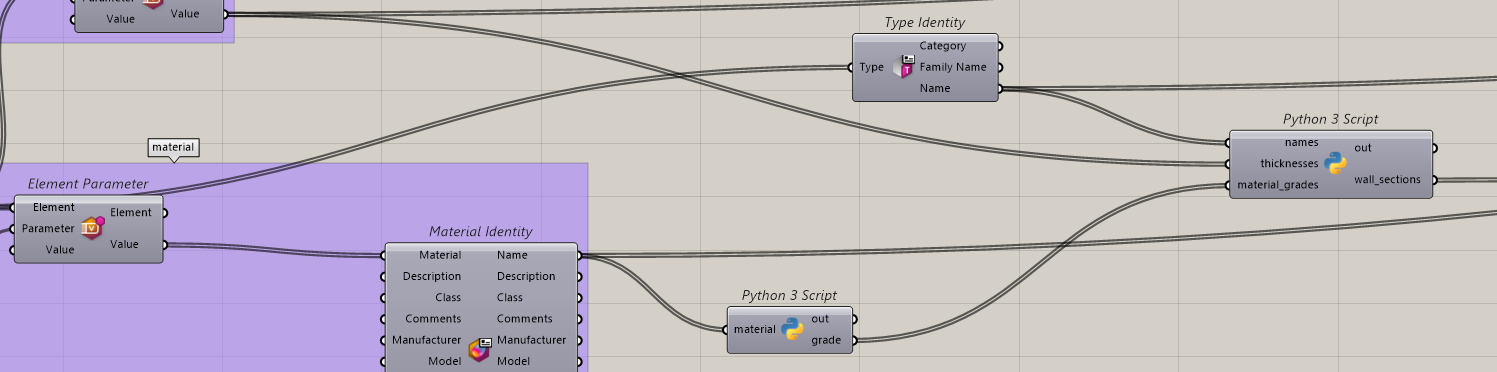

In [ ]:
wall_sections = []
check_duplicates = []
counter = 0
for name,grade,thk in zip(names,material_grades,thicknesses):
    tmp_name = name + grade + str(thk)
    if tmp_name in check_duplicates:
        continue
    wall_sections.append((counter, {
        'name':name,
        'thk':round(thk,3),
        'material_grade':grade
    }))
    check_duplicates.append(tmp_name)
    counter +=1

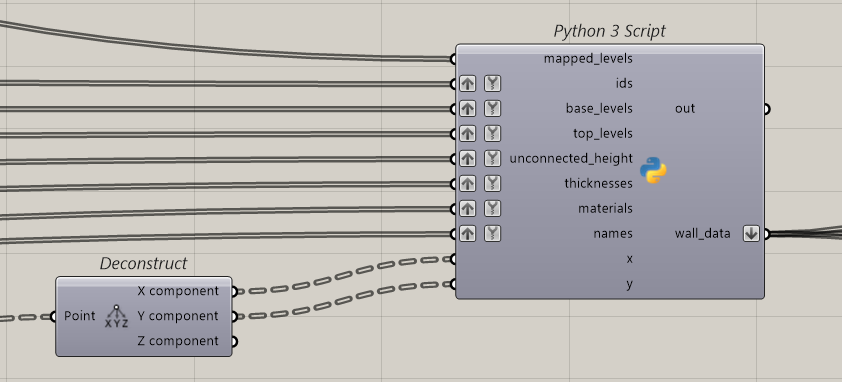

In [ ]:
levels_dict = {k:v for k,v in mapped_levels}

base_analytical_elevation = levels_dict[base_levels]['refrence_level_elevation']

if top_levels is None:
    top_level = 'Unconnected'
    revit_top_level = 'Unconnected'
    z_top = base_analytical_elevation + unconnected_height
else:
    top_analytical_elevation = levels_dict[top_levels]['refrence_level_elevation']
    top_level = levels_dict[top_levels]['refrence_level_name']
    revit_top_level = top_levels
    z_top = top_analytical_elevation

wall_data = (ids,{
    'name':names,
    'thk': round(thicknesses, 3),
    'material_name': materials,
    'material_grade' : materials.split('_')[-1].split(' ')[-1],
    'z_base':base_analytical_elevation,
    'z_top': z_top,
    'base_level': levels_dict[base_levels]['refrence_level_name'],
    'top_level': top_level,
    'revit_base_level':base_levels,
    'revit_top_level':top_levels,
    'x':x,
    'y':y,
    'revit_x':x,
    'revit_y':y
})


# END